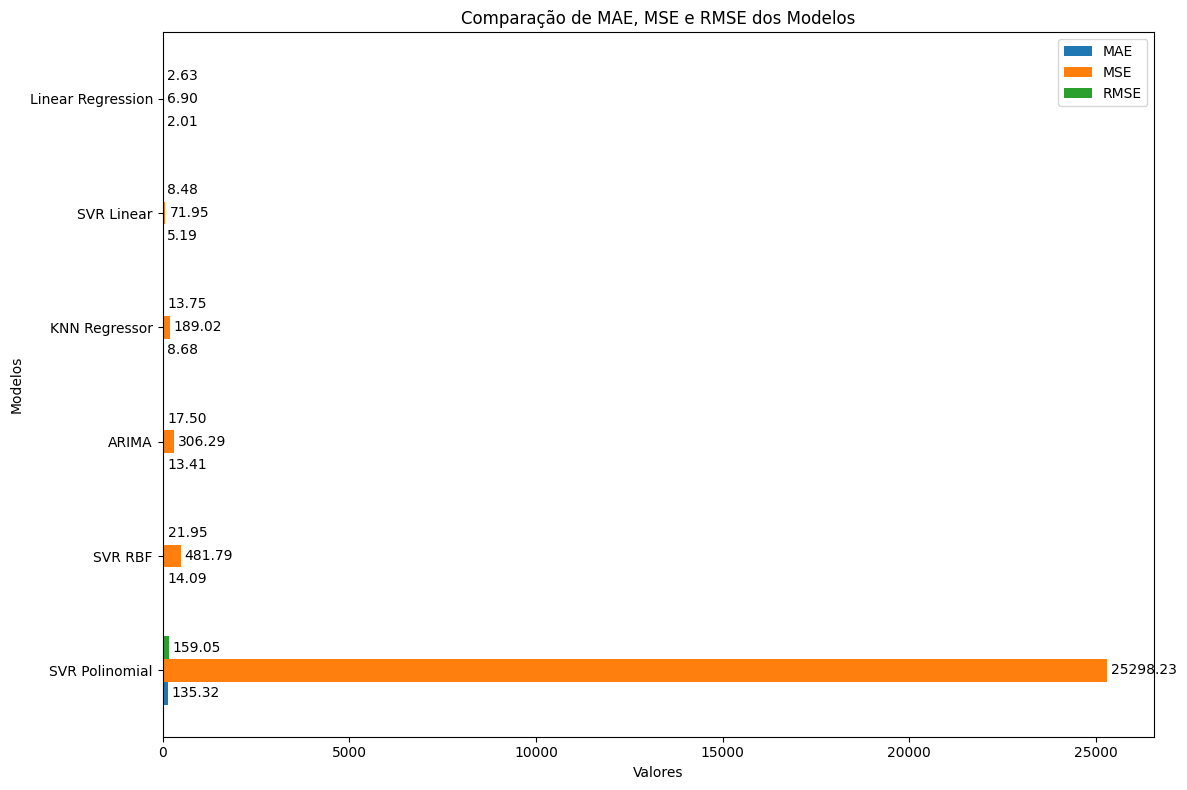

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
models = ['ARIMA', 'KNN Regressor', 'Linear Regression', 'SVR Linear', 'SVR RBF', 'SVR Polinomial']
mae = [14.09, 8.68, 2.01, 5.19, 13.41, 135.32]
mse = [306.29, 189.02, 6.90, 71.95, 481.79, 25298.23]
rmse = [17.50, 13.75, 2.63, 8.48, 21.95, 159.05]

# Ordena os dados em ordem decrescente de valor para cada métrica
def sort_data(models, values):
    sorted_indices = np.argsort(values)[::-1]
    sorted_models = [models[i] for i in sorted_indices]
    sorted_values = [values[i] for i in sorted_indices]
    return sorted_models, sorted_values

sorted_models_mae, sorted_mae = sort_data(models, mae)
sorted_models_mse, sorted_mse = sort_data(models, mse)
sorted_models_rmse, sorted_rmse = sort_data(models, rmse)

# Configuração do gráfico
y_mae = np.arange(len(sorted_models_mae))  # Posições das barras para MAE
y_mse = np.arange(len(sorted_models_mse))  # Posições das barras para MSE
y_rmse = np.arange(len(sorted_models_rmse))  # Posições das barras para RMSE

width = 0.2  # Largura das barras

# Criação do gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.barh(y_mae - width, sorted_mae, width, label='MAE')
bars2 = ax.barh(y_mse, sorted_mse, width, label='MSE')
bars3 = ax.barh(y_rmse + width, sorted_rmse, width, label='RMSE')

# Adiciona rótulos e título
ax.set_ylabel('Modelos')
ax.set_xlabel('Valores')
ax.set_title('Comparação de MAE, MSE e RMSE dos Modelos')
ax.set_yticks(y_mse)
ax.set_yticklabels(sorted_models_mse)
ax.legend()

# Adiciona os valores no topo de cada barra
def autolabel(bars):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.tight_layout()
plt.show()
